In [3]:
import pip
pip.main(["install", "pandas"])
pip.main(["install", "seaborn"])

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out. (read timeout=15)",)': /packages/7a/bf/04cfcfc9616cedd4b5dd24dfc40395965ea9f50c1db0d3f3e52b050f74a5/seaborn-0.9.0.tar.gz


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/scipy/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.python.org', port=443): Read timed out. (read timeout=15)",)': /simple/scipy/
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/scipy/


  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/fc/1c/74/c8f80a532c06a789599b8659b117ec7d7574cac4a06f7dabfe
Successfully built seaborn


0

In [4]:
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def distance(k, n, state):
    return [min(abs(k-i), n-abs(k-i)) for i in state]

In [44]:
def pos_initstate(n, x):
    return sorted([sorted([i for i in range(n) if i != k] + [k] * x) for k in range(n)])

In [91]:
def neg_initstate(n, m, x):
    r = []
    for k in range(n):
        s = []
        for i in range(n):
            if i != k:
                s += [i] * m
        s += [k] * x
        r.append(sorted(s))
    return sorted(r)

In [104]:
n = 5
m = 5
pos_init_states = [pos_initstate(n,i) for i in range(1,m+1)]
neg_init_states = [neg_initstate(n,m,i) for i in range(1,m+1)]
# for i in range(5):
#     print(pos_init_states[i])
#     print(neg_init_states[i])
#     print("---")

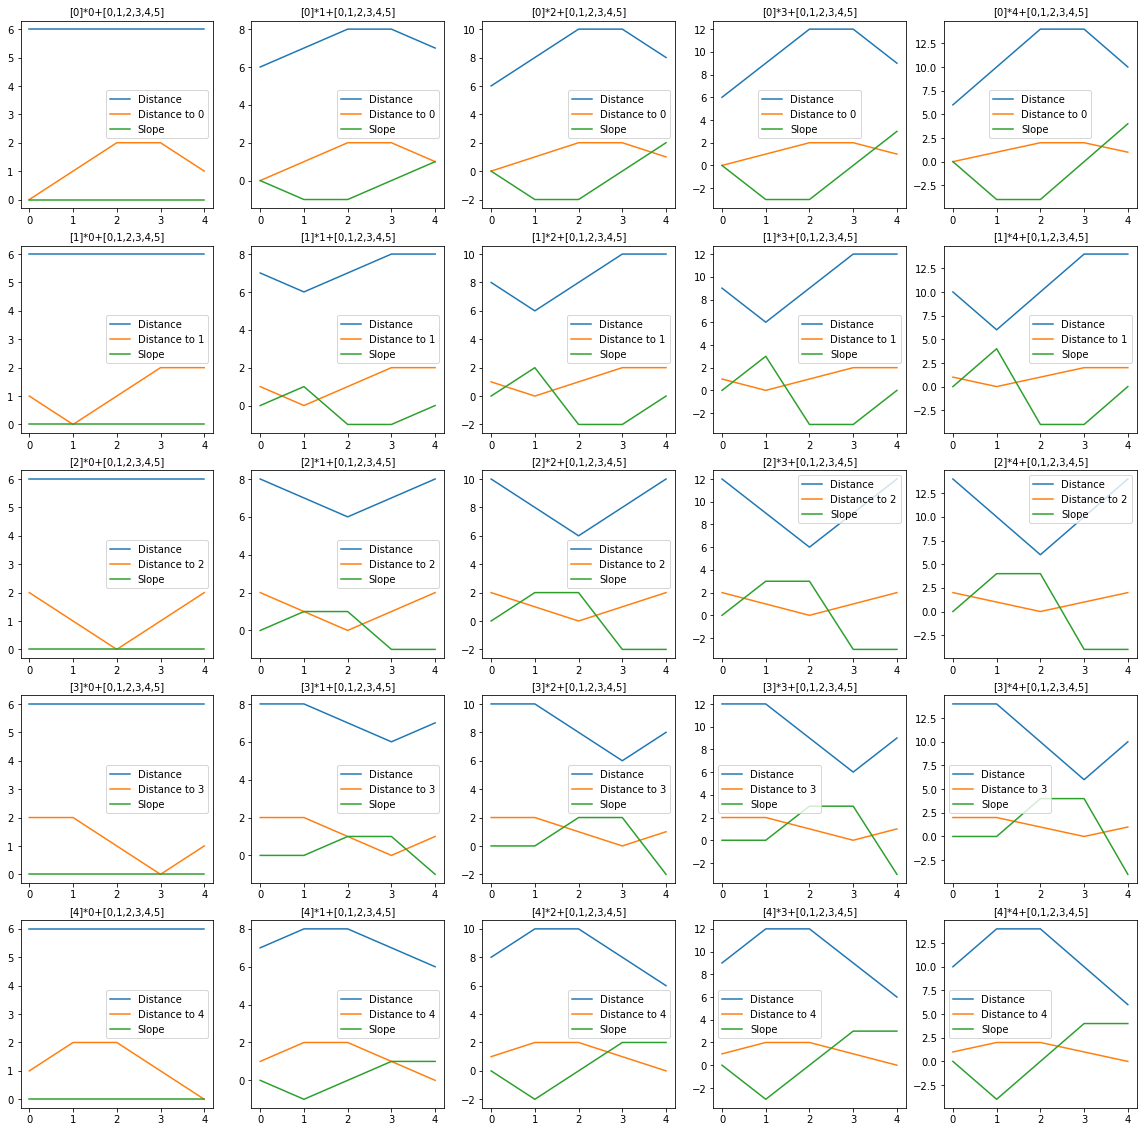

In [113]:
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))


for i in range(n):
    for j in range(n):
        state = pos_init_states[i][j]

        d = pd.DataFrame({"Distance":[sum(distance(k, n, state)) for k in range(n)], 
                          "Slope":[0] + [sum(distance(k, n, state))-sum(distance(k+1, n, state)) for k in range(n-1)],
                          "Distance to {}".format(j):[min(abs(j-k), n-abs(j-k)) for k in range(n)]})
        
        
        axarr[j][i].set_title("[{}]*{}+[0,1,2,3,4,5]".format(j,i), fontsize=10)
        d.plot.line(
            ax=axarr[j][i]
        )
        


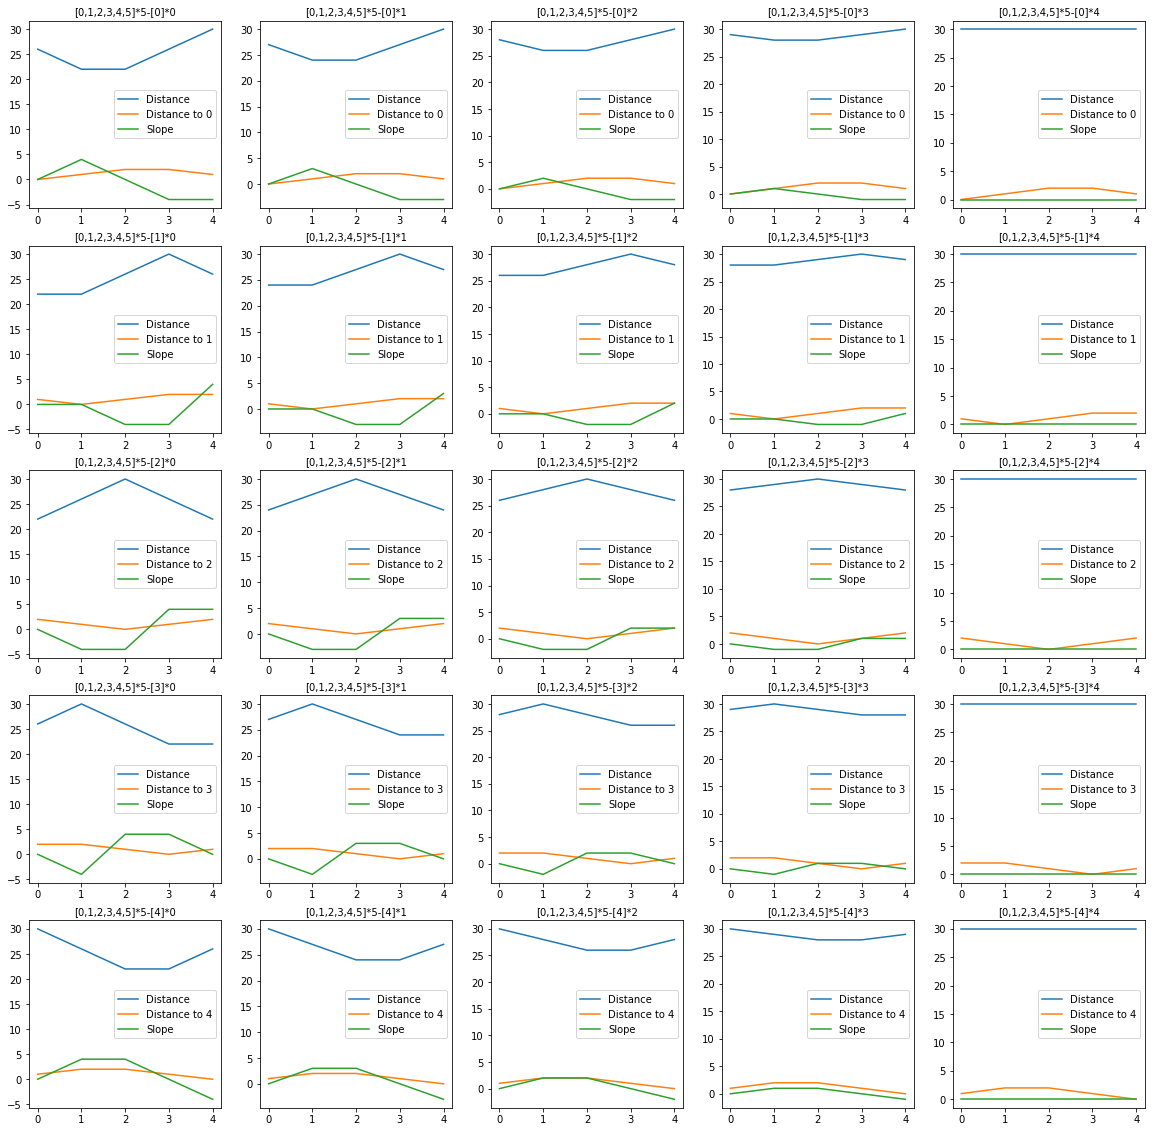

In [106]:
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))


for i in range(n):
    for j in range(n):
        
        state = neg_init_states[i][j]
        

        d = pd.DataFrame({"Distance":[sum(distance(k, n, state)) for k in range(n)], 
                          "Slope":[0] + [sum(distance(k, n, state))-sum(distance(k+1, n, state)) for k in range(n-1)],
                          "Distance to {}".format(j):[min(abs(j-k), n-abs(j-k)) for k in range(n)]})
        
        axarr[j][i].set_title("[0,1,2,3,4,5]*{}-[{}]*{}".format(m,j,i), fontsize=10)
        d.plot.line(
            ax=axarr[j][i]
        )
       

In [115]:
def masterLocksmith(k, state):
    slopeChange = defaultdict(int)
    for i in state:
        slopeChange[i] += 2 # valley
        slopeChange[(i+k/2)%k] -= 2 # peak
    cost = sum(min(i, k - i) for i in state)
    
    slope = sum((2*x >= k) - (2*x < k) for x in state)
    lastX = 0
    best = (cost, 0)
    for x in sorted(slopeChange.keys()):
        cost += (x - lastX) * slope
        slope += slopeChange[x]
        lastX = x
        best = min(best, (cost, x))
    return best[1]

In [116]:
test1 = (10, [2, 7, 1])
test2 = (3, [2, 0, 1, 2, 0, 1, 2])
test3 = (4, [1,3])
test4 = (10, [7, 8, 9, 3, 3])
test5 = (100, [97, 98, 99, 0, 1])
test6 = (360, [178, 104, 21, 81, 330, 353, 299, 263, 221, 199, 124, 261, 66, 204, 244, 337, 224, 84, 352, 91])
test7 = (360, [45, 103, 44, 107, 41, 182, 14, 53, 181, 140, 186, 271, 189, 110, 78, 208, 354, 350, 70, 231])
test8 = (360, [46, 308, 85, 256, 216, 255, 289, 255, 100, 328, 138, 265, 49, 83, 320, 189, 56, 293, 326, 127])
test9 = (3, [0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1])
test10 = (4, [3, 3, 0, 0, 2, 1, 2, 3, 0, 0, 2, 1, 2, 0, 0, 1, 3, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 3, 2, 2, 3, 1, 3, 0, 1, 0, 3, 2, 3, 2, 0, 3, 2, 0, 1, 2, 3, 0, 3, 2, 2, 3, 2, 0, 3, 0, 1, 3, 1, 2, 0, 3, 2, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 3, 2, 0, 1, 3, 2, 1, 3, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 3, 2, 2, 3, 3, 2])
test11 = (5, [2, 0, 2, 0, 2, 0, 1, 3, 3, 3, 4, 2, 2, 4, 1, 3, 4, 4, 2, 0, 0, 0, 0, 3, 0, 2, 2, 1, 0, 0, 4, 3, 3, 1, 4, 4, 3, 4, 4, 2, 4, 0, 0, 2, 4, 0, 3, 1, 2, 0, 1, 2, 0, 3, 3, 2, 0, 1, 3, 1, 4, 3, 1, 1, 3, 4, 2, 2, 3, 3, 0, 2, 3, 3, 2, 1, 0, 3, 4, 3, 4, 3, 4, 0, 3, 3, 0, 1, 1, 0, 0, 2, 2, 1, 4, 2, 1, 0, 3, 3])

In [ ]:
test = [test1, test2, test3, test4, test5, test6, test7, test8, test9, test10, test11]
fig1, axarr1 = plt.subplots(len(test), figsize=(20, 60))
for i in range(len(test)):
    n, state = test[i]
    d = pd.DataFrame({"Distance":[sum(distance(k, n, state)) for k in range(n)], 
                      "Slope":[0] + [sum(distance(k, n, state))-sum(distance(k+1, n, state)) for k in range(n-1)]})
    d.plot.line(
        ax=axarr1[i]
    )